# Capstone Project 1 Data Story - NBA Salaries and Player Performance

This Capstone 1 project is concerned with analyzing the relationships between NBA players’ salaries and performances between the years of 1991 and 2017 through graphing. A previous data wrangling project took three datasets - salaries, career length, and performance statistics - and combined them into one dataset which contained no null values or duplicate data. For this stage, we’ll be taking the dataset and exploring potential relationships graphically. 

There are several questions that can be asked :
1) Is there a trend for salaries over the course of years, and is that trend upward? 
2) Is there a connection between salary and position?
3) What does a line plot that shows individual player salaries over time or in relation to specific stats indicate?
4) What connections are there between the various stats such as PPG, VORP, PER, etc and salary?
5) Do salaries increase/decrease as performance increases/decreases?
6) Have average player statistics risen over the years at the same rate as salaries or even at all?


In [2]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Allow all columns to be displayed
pd.set_option('display.max_columns', 999)

In [5]:
# Read the relevent dataset 
dfnbaall = pd.read_csv('nba_final_dataset.csv')
dfnbaall.head(10)

Unnamed: 0              Player  year_start  year_end  Year  \
0           0      Alaa Abdelnaby        1991      1995  1991   
1           1      Alaa Abdelnaby        1991      1995  1992   
2           2      Alaa Abdelnaby        1991      1995  1993   
3           3      Alaa Abdelnaby        1991      1995  1994   
4           4      Alaa Abdelnaby        1991      1995  1995   
5           5  Mahmoud Abdul-Rauf        1991      2001  1991   
6           6  Mahmoud Abdul-Rauf        1991      2001  1992   
7           7  Mahmoud Abdul-Rauf        1991      2001  1993   
8           8  Mahmoud Abdul-Rauf        1991      2001  1994   
9           9  Mahmoud Abdul-Rauf        1991      2001  1995   

                    Team   Salary Pos   Age     G    GS      MP   PER    TS%  \
0  Portland Trailblazers   395000  PF  22.0  43.0   0.0   290.0  13.1  0.499   
1  Portland Trailblazers   494000  PF  23.0  71.0   1.0   934.0  13.5  0.533   
2         Boston Celtics   500000  PF  24.0  75.0  52.0  1311.0  13.2  0.551   
3         Boston Celtics   805000  PF  25.0  13.0   0.0   159.0   9.2  0.485   
4       Sacramento Kings   650000  PF  26.0  54.0   0.0   506.0  12.6  0.519   
5         Denver Nuggets  1660000  PG  21.0  67.0  19.0  1505.0  12.2  0.448   
6         Denver Nuggets  2008000  PG  22.0  81.0  11.0  1538.0  12.6  0.469   
7         Denver Nuggets  2358000  PG  23.0  81.0  81.0  2710.0  15.6  0.515   
8         Denver Nuggets  1825000  PG  24.0  80.0  78.0  2617.0  16.7  0.521   
9         Denver Nuggets  2200000  PG  25.0  73.0  43.0  2082.0  17.8  0.543   

    3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  OWS  DWS  \
0  0.000  0.379  10.4  23.4  17.0   5.8   0.7   2.5  14.0  22.1  0.0  0.5   
1  0.000  0.280   9.5  20.9  15.2   4.7   1.3   1.1  14.0  20.6  0.6  1.5   
2  0.002  0.245  11.0  18.1  14.6   3.0   1.0   1.2  15.6  20.5  0.7  1.3   
3  0.000  0.455   8.5  24.2  16.3   2.7   0.6   1.2  20.5  22.6 -0.2  0.1   
4  0.009  0.152   8.7  17.4  13.1   5.0   1.5   1.8  15.4  25.6 -0.4  0.7   
5  0.099  0.097   1.9   6.0   3.8  19.2   1.5   0.1   9.5  27.2 -0.7 -0.3   
6  0.111  0.128   1.5   6.8   4.0  21.0   1.4   0.2  11.6  26.7 -0.2  0.8   
7  0.140  0.165   2.0   6.8   4.4  20.8   1.5   0.2  11.0  25.5  3.0  2.2   
8  0.104  0.179   1.2   5.8   3.6  24.1   1.6   0.2   9.9  24.9  4.4  2.4   
9  0.214  0.155   1.9   5.9   3.9  23.0   1.9   0.3  10.0  25.8  3.8  1.3   

    WS  WS/48  OBPM  DBPM   BPM  VORP     FG     FGA    FG%    3P    3PA  \
0  0.5  0.079  -4.2  -0.7  -5.0  -0.2   55.0   116.0  0.474   0.0    0.0   
1  2.1  0.110  -3.0  -0.9  -3.9  -0.5  178.0   361.0  0.493   0.0    0.0   
2  2.0  0.074  -2.3  -1.9  -4.2  -0.7  245.0   473.0  0.518   0.0    1.0   
3 -0.1 -0.032  -7.1  -3.1 -10.2  -0.3   24.0    55.0  0.436   0.0    0.0   
4  0.3  0.027  -4.6  -1.7  -6.3  -0.6  118.0   231.0  0.511   0.0    2.0   
5 -1.0 -0.031  -1.7  -4.4  -6.1  -1.6  417.0  1009.0  0.413  24.0  100.0   
6  0.6  0.018  -1.7  -3.5  -5.2  -1.3  356.0   845.0  0.421  31.0   94.0   
7  5.1  0.091   1.1  -2.1  -1.0   0.7  633.0  1407.0  0.450  70.0  197.0   
8  6.8  0.125   1.6  -2.1  -0.6   0.9  588.0  1279.0  0.460  42.0  133.0   
9  5.0  0.115   2.2  -2.8  -0.6   0.7  472.0  1005.0  0.470  83.0  215.0   

     3P%     2P     2PA    2P%   eFG%     FT    FTA    FT%    ORB    DRB  \
0  0.000   55.0   116.0  0.474  0.474   25.0   44.0  0.568   27.0   62.0   
1  0.000  178.0   361.0  0.493  0.493   76.0  101.0  0.752   81.0  179.0   
2  0.000  245.0   472.0  0.519  0.518   88.0  116.0  0.759  126.0  211.0   
3  0.000   24.0    55.0  0.436  0.436   16.0   25.0  0.640   12.0   34.0   
4  0.000  118.0   229.0  0.515  0.511   20.0   35.0  0.571   37.0   77.0   
5  0.240  393.0   909.0  0.432  0.425   84.0   98.0  0.857   34.0   87.0   
6  0.330  325.0   751.0  0.433  0.440   94.0  108.0  0.870   22.0   92.0   
7  0.355  563.0  1210.0  0.465  0.475  217.0  232.0  0.935   51.0  174.0   
8  0.316  546.0  1146.0  0.476  0.476

In [6]:
# Drop the unnamed column
dfnbaall = dfnbaall.drop(columns=['Unnamed: 0'])

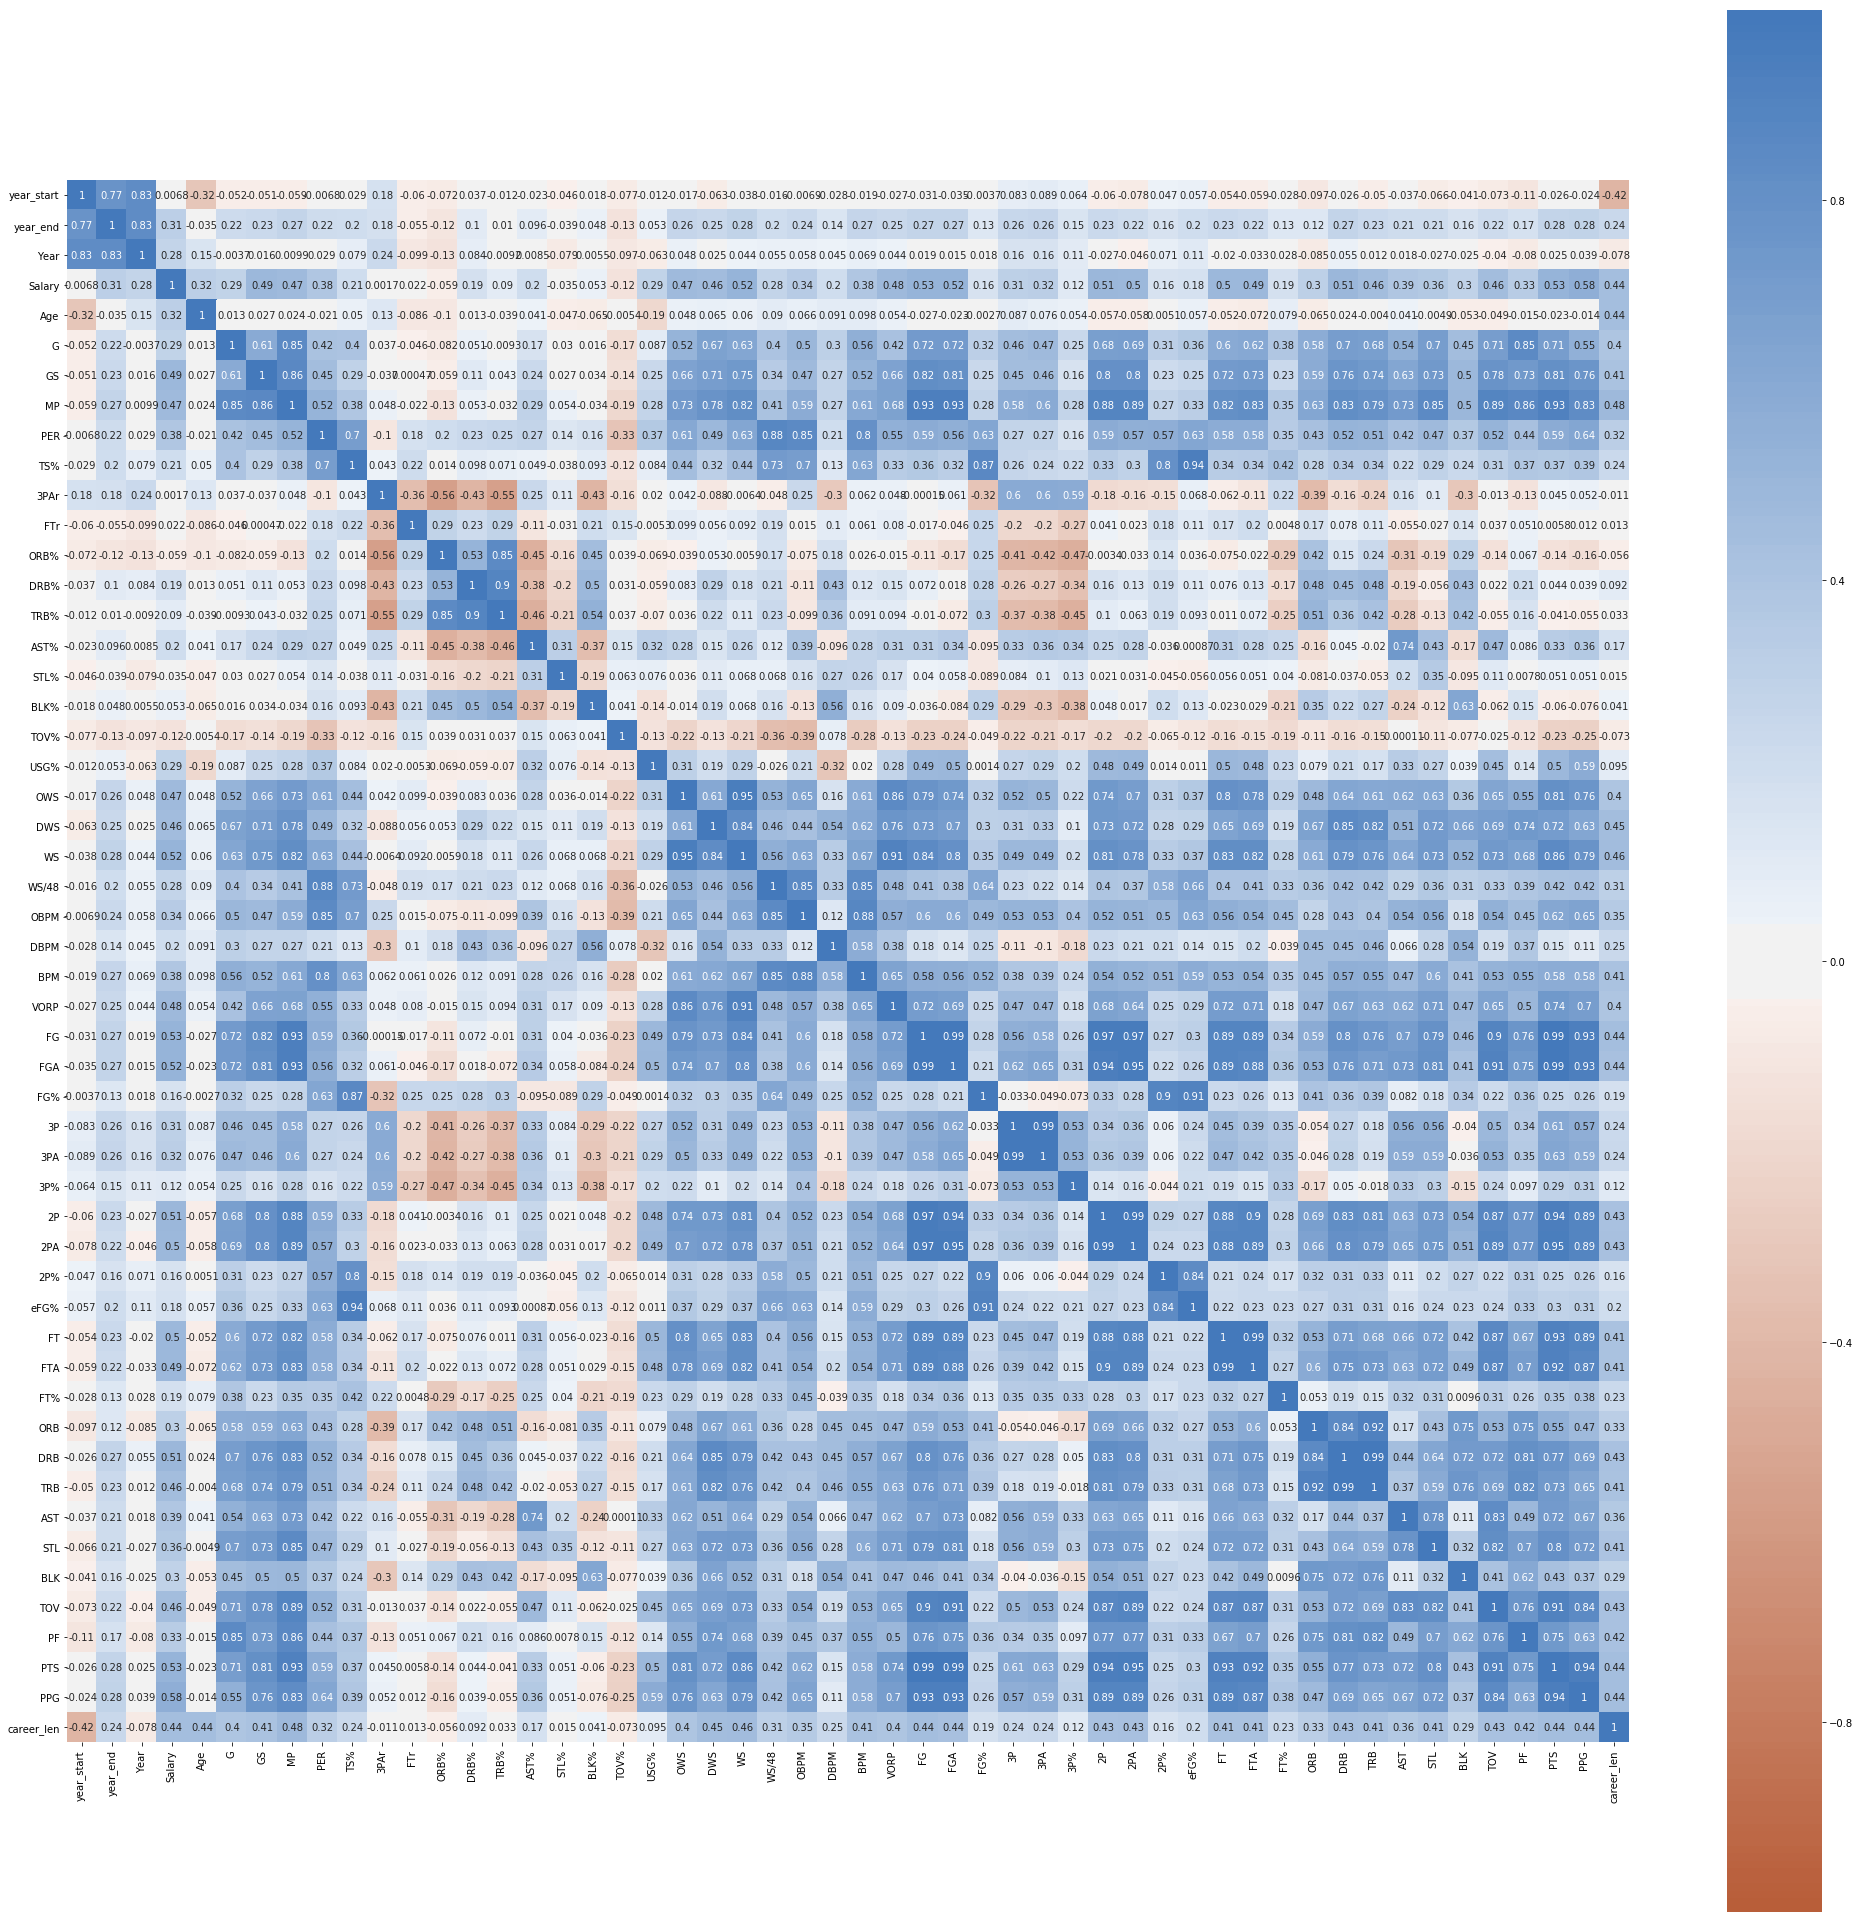

In [101]:
# PLot using a heatmap, with the correlation valies set between -1 and 1 and large enough and with a diverse color 
# scheme to easily read the resulting correlations. It is also annotated to allow for a numerical value of each
# correlation. 
plt.figure(figsize=(35, 35))
corrall = dfnbaall.corr()
axis = sns.heatmap(corrall, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(25, 250, n=200),
    square=True, annot=True)


Since we're primarily interested in relationships involving salaries, we'll look for high correlations with that 
variable.This initial heatmap doesn't seem to indicate salary having a high correlation with any particular variable, 
though there does appear to be some correlation with G, GS, WS, VORP, FG, FG%, PTS, and PPG. It makes sense that playersthat start more games will have higher salaries. Good performances lead to both increased play time and increased pay. And, in turn, if a player is playing more often that leads to increased scoring, both overall and per game. However, some of the other aforementioned parameters such as WS and VORP may be worth investigating further. PER, while not showing a high correlation with salary may be worth looking at more closely as well because it's often seen as a stat that indicates how well a player is performing. 

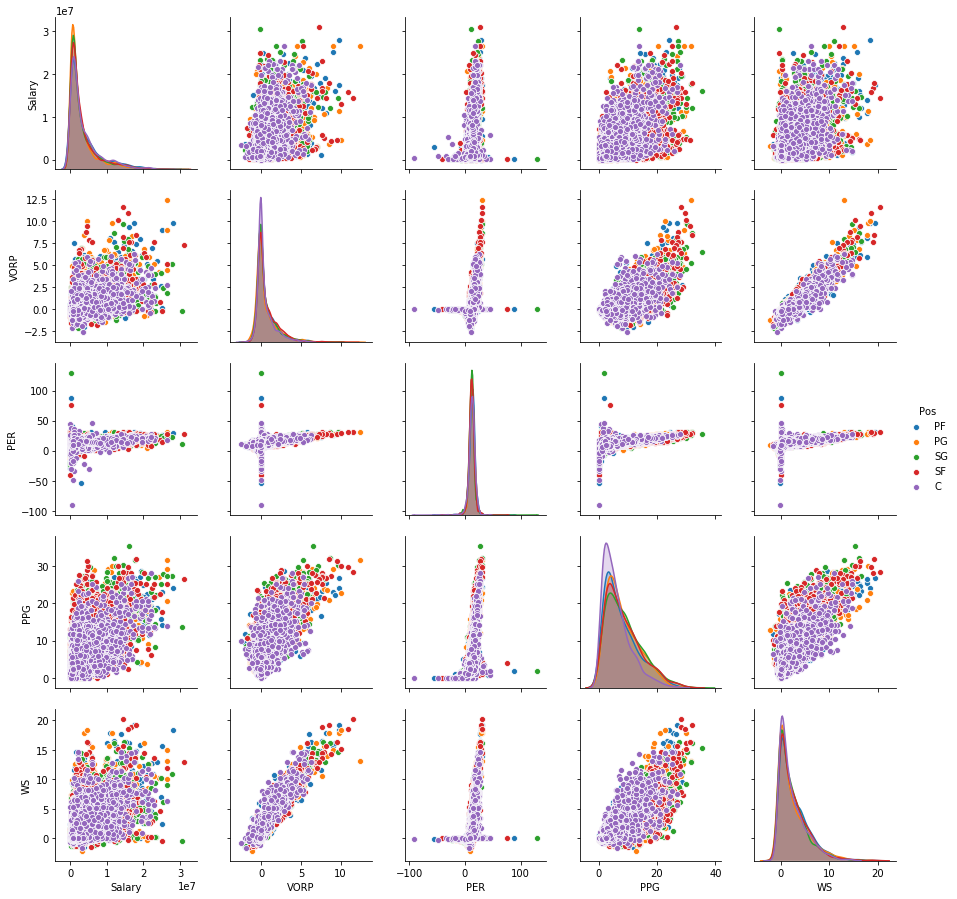

In [8]:
# The pairplot has been colored by position to see if any trends are apparent by position. It appears that centers 
# cluster much closer together than other positions, particularly small forwards.  
sns.pairplot(dfnbaall, vars=['Salary', 'VORP', 'PER', 'PPG', 'WS'], hue='Pos')

This pairplot of some of the aformentioned variables shows a correlation between some of those variables. In particular, 
VORP seems to have a correlation with salary and PPG. Other interesting relationships include VORP and WS, PPG and VORP, 
and PPG and WS. Upon closer inspection, WS and Salary don't seem as correlated as the heatmap had suggested. 
All of them, except PER, are heavily right-skewed. We can now begin answering some of the questions above.

### 1) Is there a trend for salaries over the course of years, and is that trend upward?

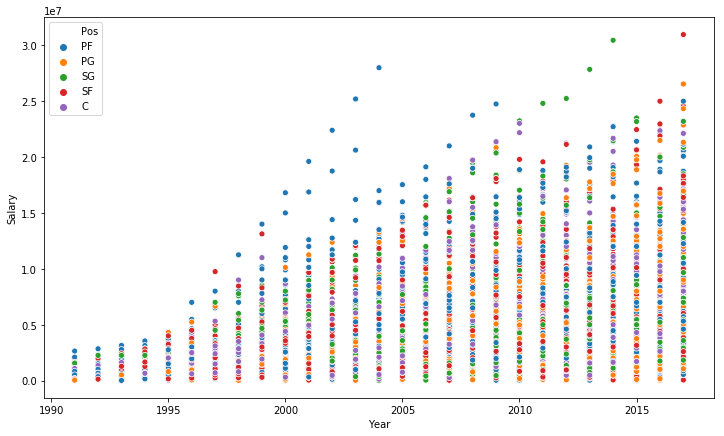

In [37]:
# A scatterplot of salary versus years, hued by position. 
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Year', y='Salary', data=dfnbaall, hue='Pos')

The scatterplot, hued based on positions, makes it clear that salaries have generally trended upward since 1991. 
Before 2005, it appears that most of the outliers were PFs. More recently, it appears that shooting guards are the outliers. 
We'll need to plot out different graphs to answer our next question about positions.

### 2) Is there a connection between salary and position? 

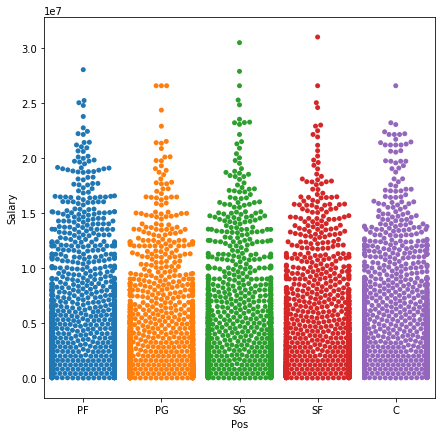

In [40]:
# A swarmplot that categorizes salaries based on position. 
plt.figure(figsize=(7, 7))
sns.swarmplot(x='Pos', y='Salary', data=dfnbaall)
plt.show()

The bulk of salaries have been below 15 million for all positions over all seasons in the dataset. And while it appears that
point guards have generally had lower salaries, it would be a good idea to plot a boxplot for clarification.

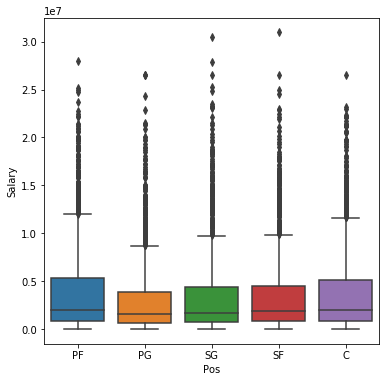

In [42]:
# A boxplot that, again, categorizes salaries based on position.
plt.figure(figsize=(6, 6))
sns.boxplot(x='Pos', y='Salary', data=dfnbaall)

The above boxplot of salary vs position indicates that PGs have a more concntrated box plot and less extreme outliers.
This suggests that, in general, that point guards have been paid less than other positions.  It’s not immediately clear why this is the case. Perhaps it is because teams carry more guards than any other position, driving down their salaries, or it may be due to other positions being less expendable. It's likely beyond the scope of this data to determine the actual answer. 

### 3) What does a line plot that shows individual player salaries over time indicate? 

Player
A.J. Bramlett          AxesSubplot(0.125,0.125;0.775x0.755)
A.J. English           AxesSubplot(0.125,0.125;0.775x0.755)
A.J. Guyton            AxesSubplot(0.125,0.125;0.775x0.755)
A.J. Price             AxesSubplot(0.125,0.125;0.775x0.755)
A.J. Wynder            AxesSubplot(0.125,0.125;0.775x0.755)
Aaron Brooks           AxesSubplot(0.125,0.125;0.775x0.755)
Aaron Gordon           AxesSubplot(0.125,0.125;0.775x0.755)
Aaron Gray             AxesSubplot(0.125,0.125;0.775x0.755)
Aaron Harrison         AxesSubplot(0.125,0.125;0.775x0.755)
Aaron McKie            AxesSubplot(0.125,0.125;0.775x0.755)
Aaron Miles            AxesSubplot(0.125,0.125;0.775x0.755)
Aaron Swinson          AxesSubplot(0.125,0.125;0.775x0.755)
Aaron Williams         AxesSubplot(0.125,0.125;0.775x0.755)
Acie Earl              AxesSubplot(0.125,0.125;0.775x0.755)
Acie Law               AxesSubplot(0.125,0.125;0.775x0.755)
Adam Harrington        AxesSubplot(0.125,0.125;0.775x0.755)
Adam Keefe             AxesSubplo

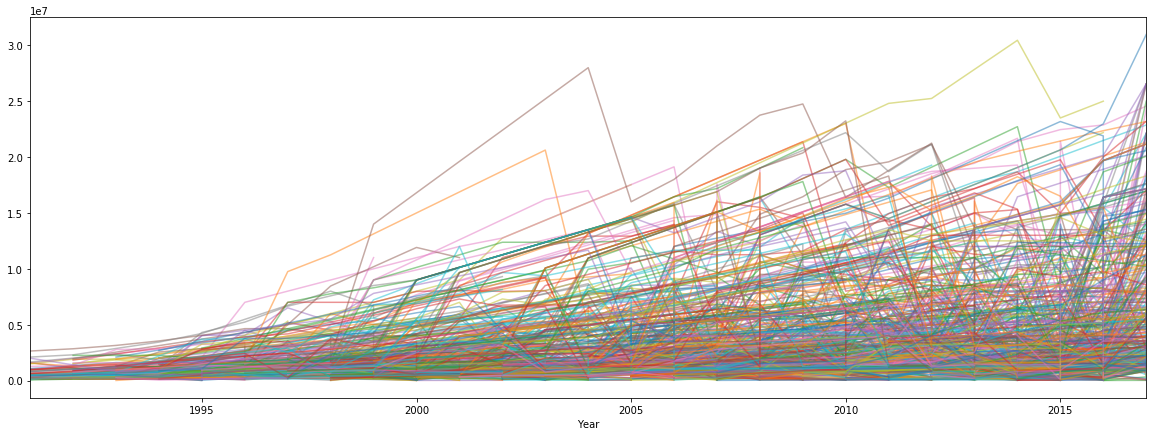

In [75]:
# A line plot that takes every player's salary over the course of their career. The original data set is grouped
# according to player, and the lines are set at a lower alpha level to allow for better visualization.
figure, ax = plt.subplots()
dfnbaall.groupby('Player').plot(x='Year', y='Salary', ax=ax, legend=False, figsize=(20, 7), alpha=0.5)

This graph of every player's salary over the course of their career may be a bit messy, but there are some takeaways evident. Again, salaries increase overall from 1991 to 2017
But it's also more evident that salaries increase and decrease over the course of most players' careers. That is,
it isn't always the case that a player's salary will continue to increase over the course of their career. As they age, and their skills diminish, many players are likely going to be signed to smaller contracts than those when their skills were at their peak. 

### 4) What connections are there between the various stats such as PPG, VORP, PER, etc and salary? 5) Do salaries increase/decrease as performance increases/decreases?

We can likely answer questions four and five togther when we consider graphing all of those variables against age. Recall that our heatmap and pairplot indicated that most of these stats had a fairly strong correlation with salary.

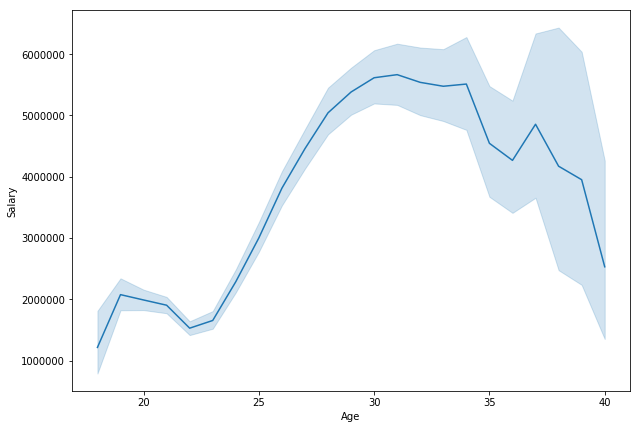

In [76]:
# A line plot that traces salary at every age.
plt.figure(figsize=(10, 7))
sns.lineplot(x='Age', y='Salary', data=dfnbaall)

Graphing age vs salary reveals that salaries increase quite a bit as players reach their late 20s and 
early 30s. With the exception of a few outliers, salaries then begin to drop after about the age of 34 
and continue to do so as players approach 40.

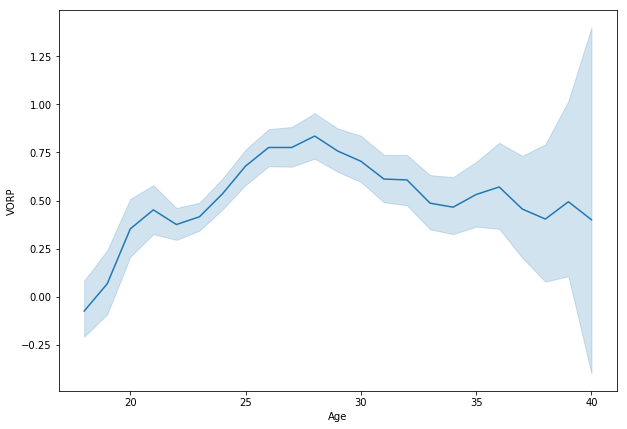

In [77]:
# Line plot of VORP against age
plt.figure(figsize=(10, 7))
sns.lineplot(x='Age', y='VORP', data=dfnbaall)

VORP (value over replacement player) peaks in the late 20s and continues to fall through the rest of most players' careers.

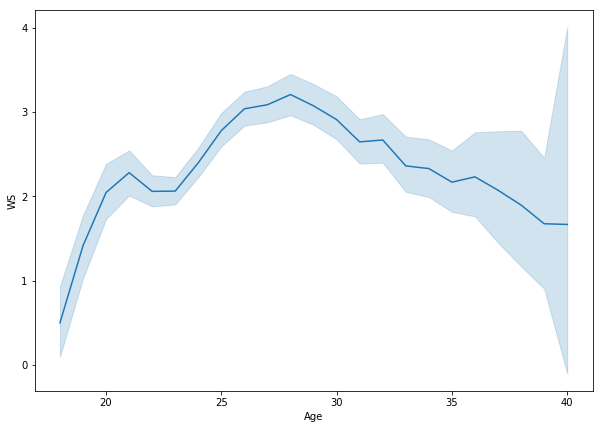

In [78]:
# Again, a line plot of  WS against age.
plt.figure(figsize=(10, 7))
sns.lineplot(x='Age', y='WS', data=dfnbaall)

WS (win shares) is highly correlated with VORP, so it's not surprising that their graphs look very similar.

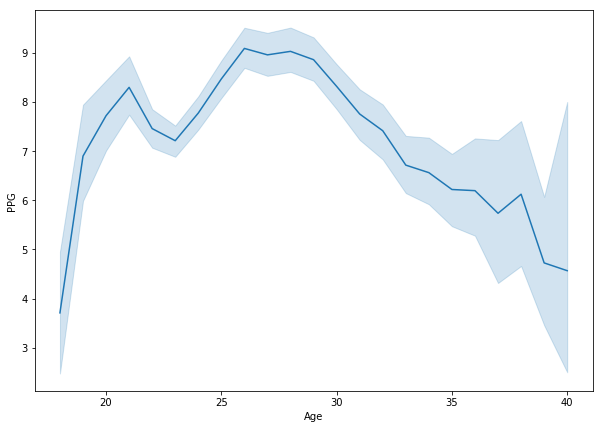

In [79]:
# PPG vs. age
plt.figure(figsize=(10, 7))
sns.lineplot(x='Age', y='PPG', data=dfnbaall)

PPG (points per game) peaks even earlier than the previous stats and falls at an even steeper rate after 30. 

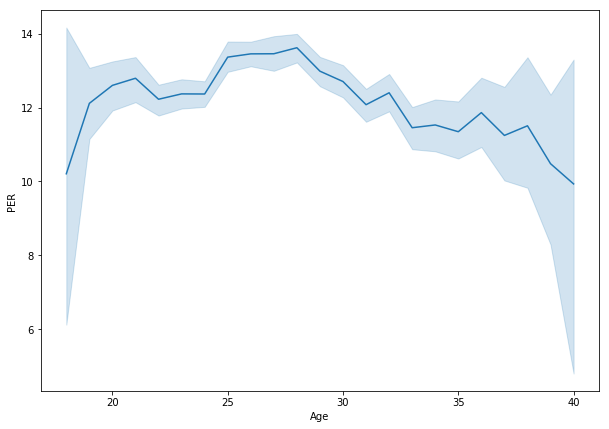

In [81]:
# Finally, PER vs. age
plt.figure(figsize=(10, 7))
sns.lineplot(x='Age', y='PER', data=dfnbaall)

PER (player efficiency rating) remains a bit more steady than the other stats, but it still seems to peak in the mid to late 20s and drops
off after 30.

It appears, based on the above graphs of salary and stats against age, that careers peak in the mid to late 20s, but that salaries peak in the early 30s. That likely indicates that players get paid higher salaries once they have proven to be strong performers. The lag between performance increase and salary increase is likely due to older, less lucrative contracts needing to expire before more lucrative contracts can be signed, as well as teams needing to reassure themselves that players are proven performers.

There are a couple of possible takeaways here for both players and teams. For players, it may be better to sign shorter contracts in their early to mid 20s while their skills are at their peak in order for them to have a chance at more lucrative contracts as early as possible. And, then, to sign onto long term lucrative contracts knowing that their skills will soon begin to diminish.

For teams, it's important to realize how skills diminish over time. Looking at some of the above graphs, younger players perform almost as well, and in some cases better than older players. Given the fact that younger players are more affordable and that performance does not seem to be drastically lower, it may be smarter for most teams to invest in younger players rather than veterans. 

 

Before we move onto answering our last question, we need to address a bias in the dataset. In a previous data wrangling project,  we created our current dataset by dropping any players that had not begun their careers in 1991 or after. This was done due to the limitations of a salary dataset that only began in 1991. The consequence of this is that our populations for the 1990s are far smaller than subsequent years because older players are not included in that decade. As a result, many prominent players such as Michael Jordan, Magic Johnson, and Patrick Ewing are not on this list. We can graph a count plot to see the difference in yearly population size.

In [82]:
# Number of players each year sorted by year.
dfnbaall['Year'].value_counts(ascending=True).sort_index()

1991     68
1992    104
1993    143
1994    172
1995    200
1996    240
1997    256
1998    279
1999    309
2000    343
2001    350
2002    371
2003    388
2004    396
2005    428
2006    441
2007    456
2008    445
2009    438
2010    443
2011    445
2012    461
2013    472
2014    512
2015    529
2016    504
2017    428
Name: Year, dtype: int64

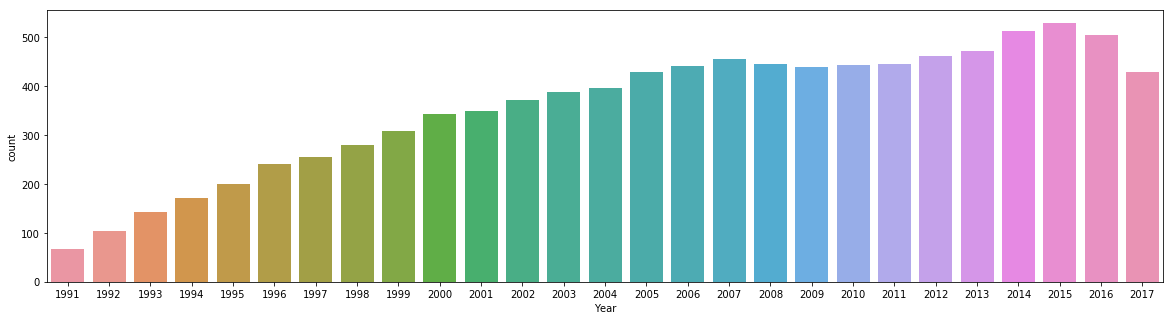

In [83]:
# A count plot representation of the yearly player population data.
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=dfnbaall)

As previous graphs have indicated, most veterans (up to a certain age) make more money than their younger counterparts. As the list and graph above indicate, the sample sizes of players in the 1990s are far smaller than subsequent years. Thus, it's one of the reasons that average salaries in the 1990s are lower than in the 2000s. However, due to inflation and increased salary caps, salaries in the 1990s would be lower regardless, just not as dramatically as these graphs suggest. By 2005, the yearly population appears to have stabilized, and we can see that salaries are still lower in most years compared to the most current years in the dataset. So, it's safe to assume that salaries in the 1990s were still lower than those in this decade.

### 6) Have average player statistics risen over the years at the same rate as salaries or even at all?

Thus far we've seen that salaries have increased quite a bit since 1991, in spite of the aforementioned biased in this dataset. However, have player performances increased at the same rate? There are, of course, human limitations that only allow for a certain amount of improvement. At the same time, athletes have become more athletic, our training techniques have improved, and the way that the game is played has changed. Regarding this last point, due to rule changes, the current style of play does favor offenses rather than defenses and - point shots are much more common than they used to be. So, it'll be curious to see whether certain metrics have increased over the years, and if they've increased similarly to salary. 

One reason to ask this question is that players are being paid more than ever before. Are they playing far better than players of the past to warrant such a salary increase or are they being paid more for other reasons (such as better union-negotiated benefits and the fact that the league continues to increase revenue every year). There are likely a great number of factors involved, but with this dataset we can at least get a sense of whether players are outperforming their past counterparts on the court to warrant higher salaries.

In [14]:
# Grouping by year and averaging all stats. All values are rounded to 3 decimal places. 
nbaavg = dfnbaall.groupby(['Year']).mean().round(3)
nbaavg

year_start  year_end       Salary     Age       G      GS        MP  \
Year                                                                        
1991    1992.956  1998.926   560661.765  23.662  54.441  14.794   901.868   
1992    1992.481  1998.962   644471.154  23.538  53.856  17.673  1016.769   
1993    1992.762  1999.294   705643.357  23.909  53.622  21.329  1107.804   
1994    1993.029  2000.558   906750.000  24.227  55.483  22.773  1167.244   
1995    1993.520  2001.470  1118161.360  24.695  55.570  26.880  1292.840   
1996    1994.204  2002.038  1303502.333  24.958  54.325  25.642  1252.200   
1997    1994.695  2003.223  1574953.906  25.410  57.559  28.070  1359.168   
1998    1995.258  2004.043  1780811.373  25.466  55.957  27.484  1331.799   
1999    1995.828  2004.981  2121927.291  25.777  34.395  15.793   782.006   
2000    1996.560  2005.650  2375219.003  26.090  55.190  25.359  1278.883   
2001    1997.143  2006.540  2935708.634  26.417  55.877  26.894  1331.523   
2002    1998.164  2007.658  3064961.178  26.194  55.032  26.712  1315.482   
2003    1998.946  2008.361  3258267.528  26.474  56.366  27.013  1338.338   
2004    1999.553  2009.316  3482605.889  26.694  55.773  27.278  1335.699   
2005    2000.404  2010.121  3591529.012  26.682  55.916  27.390  1328.921   
2006    2001.562  2011.116  3831021.152  26.417  54.923  26.925  1307.308   
2007    2002.654  2011.917  3852499.654  26.292  54.647  26.706  1295.283   
2008    2003.178  2012.728  4251013.440  26.703  55.744  27.321  1320.045   
2009    2004.148  2013.651  4536893.664  26.548  55.642  27.331  1334.484   
2010    2004.986  2014.447  4427066.178  26.720  56.323  27.609  1342.993   
2011    2006.056  2015.133  4350040.139  26.620  56.436  27.357  1331.063   
2012    2006.907  2015.597  4267172.950  26.657  45.204  21.614  1043.935   
2013    2007.871  2016.165  4224763.576  26.680  55.627  26.261  1278.458   
2014    2009.176  2016.584  3933022.643  26.520  52.197  24.373  1200.250   
2015    2010.070  2016.960  4026876.926  26.618  51.635  23.694  1165.571   
2016    2010.937  2017.403  4583178.714  26.677  53.748  24.893  1214.280   
2017    2011.638  2017.755  6447120.070  26.977  55.731  27.189  1299.521   

         PER    TS%   3PAr    FTr   ORB%    DRB%    TRB%    AST%   STL%  \
Year                                                                      
1991  12.316  0.496  0.077  0.350  7.453  12.740  10.103  12.281  1.450   
1992  11.787  0.491  0.086  0.315  7.127  12.754   9.937  11.981  1.690   
1993  13.020  0.511  0.090  0.340  7.429  13.213  10.287  12.804  1.787   
1994  12.853  0.503  0.110  0.343  7.427  13.633  10.518  12.569  1.819   
1995  12.084  0.506  0.185  0.353  6.587  12.942   9.753  12.964  1.775   
1996  12.680  0.511  0.173  0.353  7.050  13.451  10.235  13.148  1.788   
1997  12.833  0.512  0.195  0.330  6.881  13.746  10.298  12.737  1.786   
1998  12.726  0.495  0.151  0.340  7.141  13.279  10.202  13.042  1.910   
1999  12.413  0.486  0.156  0.339  7.199  13.242  10.196  12.611  1.770   
2000  12.524  0.495  0.146  0.315  6.454  13.718  10.073  13.019  1.709   
2001  12.647  0.494  0.148  0.316  6.363  14.267  10.301  12.941  1.650   
2002  12.943  0.497  0.155  0.312  6.451  14.123  10.288  12.725  1.626   
2003  12.374  0.484  0.158  0.301  6.361  13.844  10.094  13.090  1.699   
2004  12.401  0.487  0.162  0.296  6.157  13.899  10.027  12.705  1.692   
2005  12.559  0.502  0.176  0.321  6.127  14.018  10.069  12.658  1.614   
2006  12.322  0.507  0.176  0.343  5.966  14.502  10.241  12.033  1.567   
2007  12.327  0.513  0.201  0.348  6.001  14.430  10.216  12.276  1.501   
2008  12.704  0.513  0.212  0.314  5.709  14.397  10.049  12.490  1.491   
2009  13.055  0.520  0.211  0.299  6.246  14.776  10.518  11.931  1.505   
2010  13.016  0.524  0.214  0.303  5.733  14.455  10.086  12.439  1.525   
2011  12.568  0.514  0.217  0.304  5.473  14.324   9.902  12.566  1.530   
2012  12.992  0.504  0.225  0.275  5.572  14.25

In [15]:
# Resetting the index
nbaavg = nbaavg.reset_index()
nbaavg

Year  year_start  year_end       Salary     Age       G      GS        MP  \
0   1991    1992.956  1998.926   560661.765  23.662  54.441  14.794   901.868   
1   1992    1992.481  1998.962   644471.154  23.538  53.856  17.673  1016.769   
2   1993    1992.762  1999.294   705643.357  23.909  53.622  21.329  1107.804   
3   1994    1993.029  2000.558   906750.000  24.227  55.483  22.773  1167.244   
4   1995    1993.520  2001.470  1118161.360  24.695  55.570  26.880  1292.840   
5   1996    1994.204  2002.038  1303502.333  24.958  54.325  25.642  1252.200   
6   1997    1994.695  2003.223  1574953.906  25.410  57.559  28.070  1359.168   
7   1998    1995.258  2004.043  1780811.373  25.466  55.957  27.484  1331.799   
8   1999    1995.828  2004.981  2121927.291  25.777  34.395  15.793   782.006   
9   2000    1996.560  2005.650  2375219.003  26.090  55.190  25.359  1278.883   
10  2001    1997.143  2006.540  2935708.634  26.417  55.877  26.894  1331.523   
11  2002    1998.164  2007.658  3064961.178  26.194  55.032  26.712  1315.482   
12  2003    1998.946  2008.361  3258267.528  26.474  56.366  27.013  1338.338   
13  2004    1999.553  2009.316  3482605.889  26.694  55.773  27.278  1335.699   
14  2005    2000.404  2010.121  3591529.012  26.682  55.916  27.390  1328.921   
15  2006    2001.562  2011.116  3831021.152  26.417  54.923  26.925  1307.308   
16  2007    2002.654  2011.917  3852499.654  26.292  54.647  26.706  1295.283   
17  2008    2003.178  2012.728  4251013.440  26.703  55.744  27.321  1320.045   
18  2009    2004.148  2013.651  4536893.664  26.548  55.642  27.331  1334.484   
19  2010    2004.986  2014.447  4427066.178  26.720  56.323  27.609  1342.993   
20  2011    2006.056  2015.133  4350040.139  26.620  56.436  27.357  1331.063   
21  2012    2006.907  2015.597  4267172.950  26.657  45.204  21.614  1043.935   
22  2013    2007.871  2016.165  4224763.576  26.680  55.627  26.261  1278.458   
23  2014    2009.176  2016.584  3933022.643  26.520  52.197  24.373  1200.250   
24  2015    2010.070  2016.960  4026876.926  26.618  51.635  23.694  1165.571   
25  2016    2010.937  2017.403  4583178.714  26.677  53.748  24.893  1214.280   
26  2017    2011.638  2017.755  6447120.070  26.977  55.731  27.189  1299.521   

       PER    TS%   3PAr    FTr   ORB%    DRB%    TRB%    AST%   STL%   BLK%  \
0   12.316  0.496  0.077  0.350  7.453  12.740  10.103  12.281  1.450  1.569   
1   11.787  0.491  0.086  0.315  7.127  12.754   9.937  11.981  1.690  1.562   
2   13.020  0.511  0.090  0.340  7.429  13.213  10.287  12.804  1.787  1.363   
3   12.853  0.503  0.110  0.343  7.427  13.633  10.518  12.569  1.819  1.545   
4   12.084  0.506  0.185  0.353  6.587  12.942   9.753  12.964  1.775  1.565   
5   12.680  0.511  0.173  0.353  7.050  13.451  10.235  13.148  1.788  1.734   
6   12.833  0.512  0.195  0.330  6.881  13.746  10.298  12.737  1.786  1.809   
7   12.726  0.495  0.151  0.340  7.141  13.279  10.202  13.042  1.910  1.596   
8   12.413  0.486  0.156  0.339  7.199  13.242  10.196  12.611  1.770  1.575   
9   12.524  0.495  0.146  0.315  6.454  13.718  10.073  13.019  1.709  1.528   
10  12.647  0.494  0.148  0.316  6.363  14.267  10.301  12.941  1.650  1.606   
11  12.943  0.497  0.155  0.312  6.451  14.123  10.288  12.725  1.626  1.712   
12  12.374  0.484  0.158  0.301  6.361  13.844  10.094  13.090  1.699  1.597   
13  12.401  0.487  0.162  0.296  6.157  13.899  10.027  12.705  1.692  1.531   
14  12.559  0.502  0.176  0.321  6.127  14.018  10.069  12.658  1.614  1.522   
15  12.322  0.507  0.176  0.343  5.966  14.502  10.241  12.033  1.567  1.460   
16  12.327  0.513  0.201  0.348  6.001  14.430  10.216  12.276  1.501  1.459   
17  12.704  0.513  0.212  0.314  5.709  14.397  10.049  12.490  1.491  1.589   
18  13.055  0.520  0.211  0.299  6.246  14.776  10.518  11.931  1.505  1.721   
19  13.016  0.524  0.214  0.303  5.733  14.455  10.086  12.439  1.525  1.627   
20  12.568  0.514  0.217  0.304  5.473  14.324   9.902 

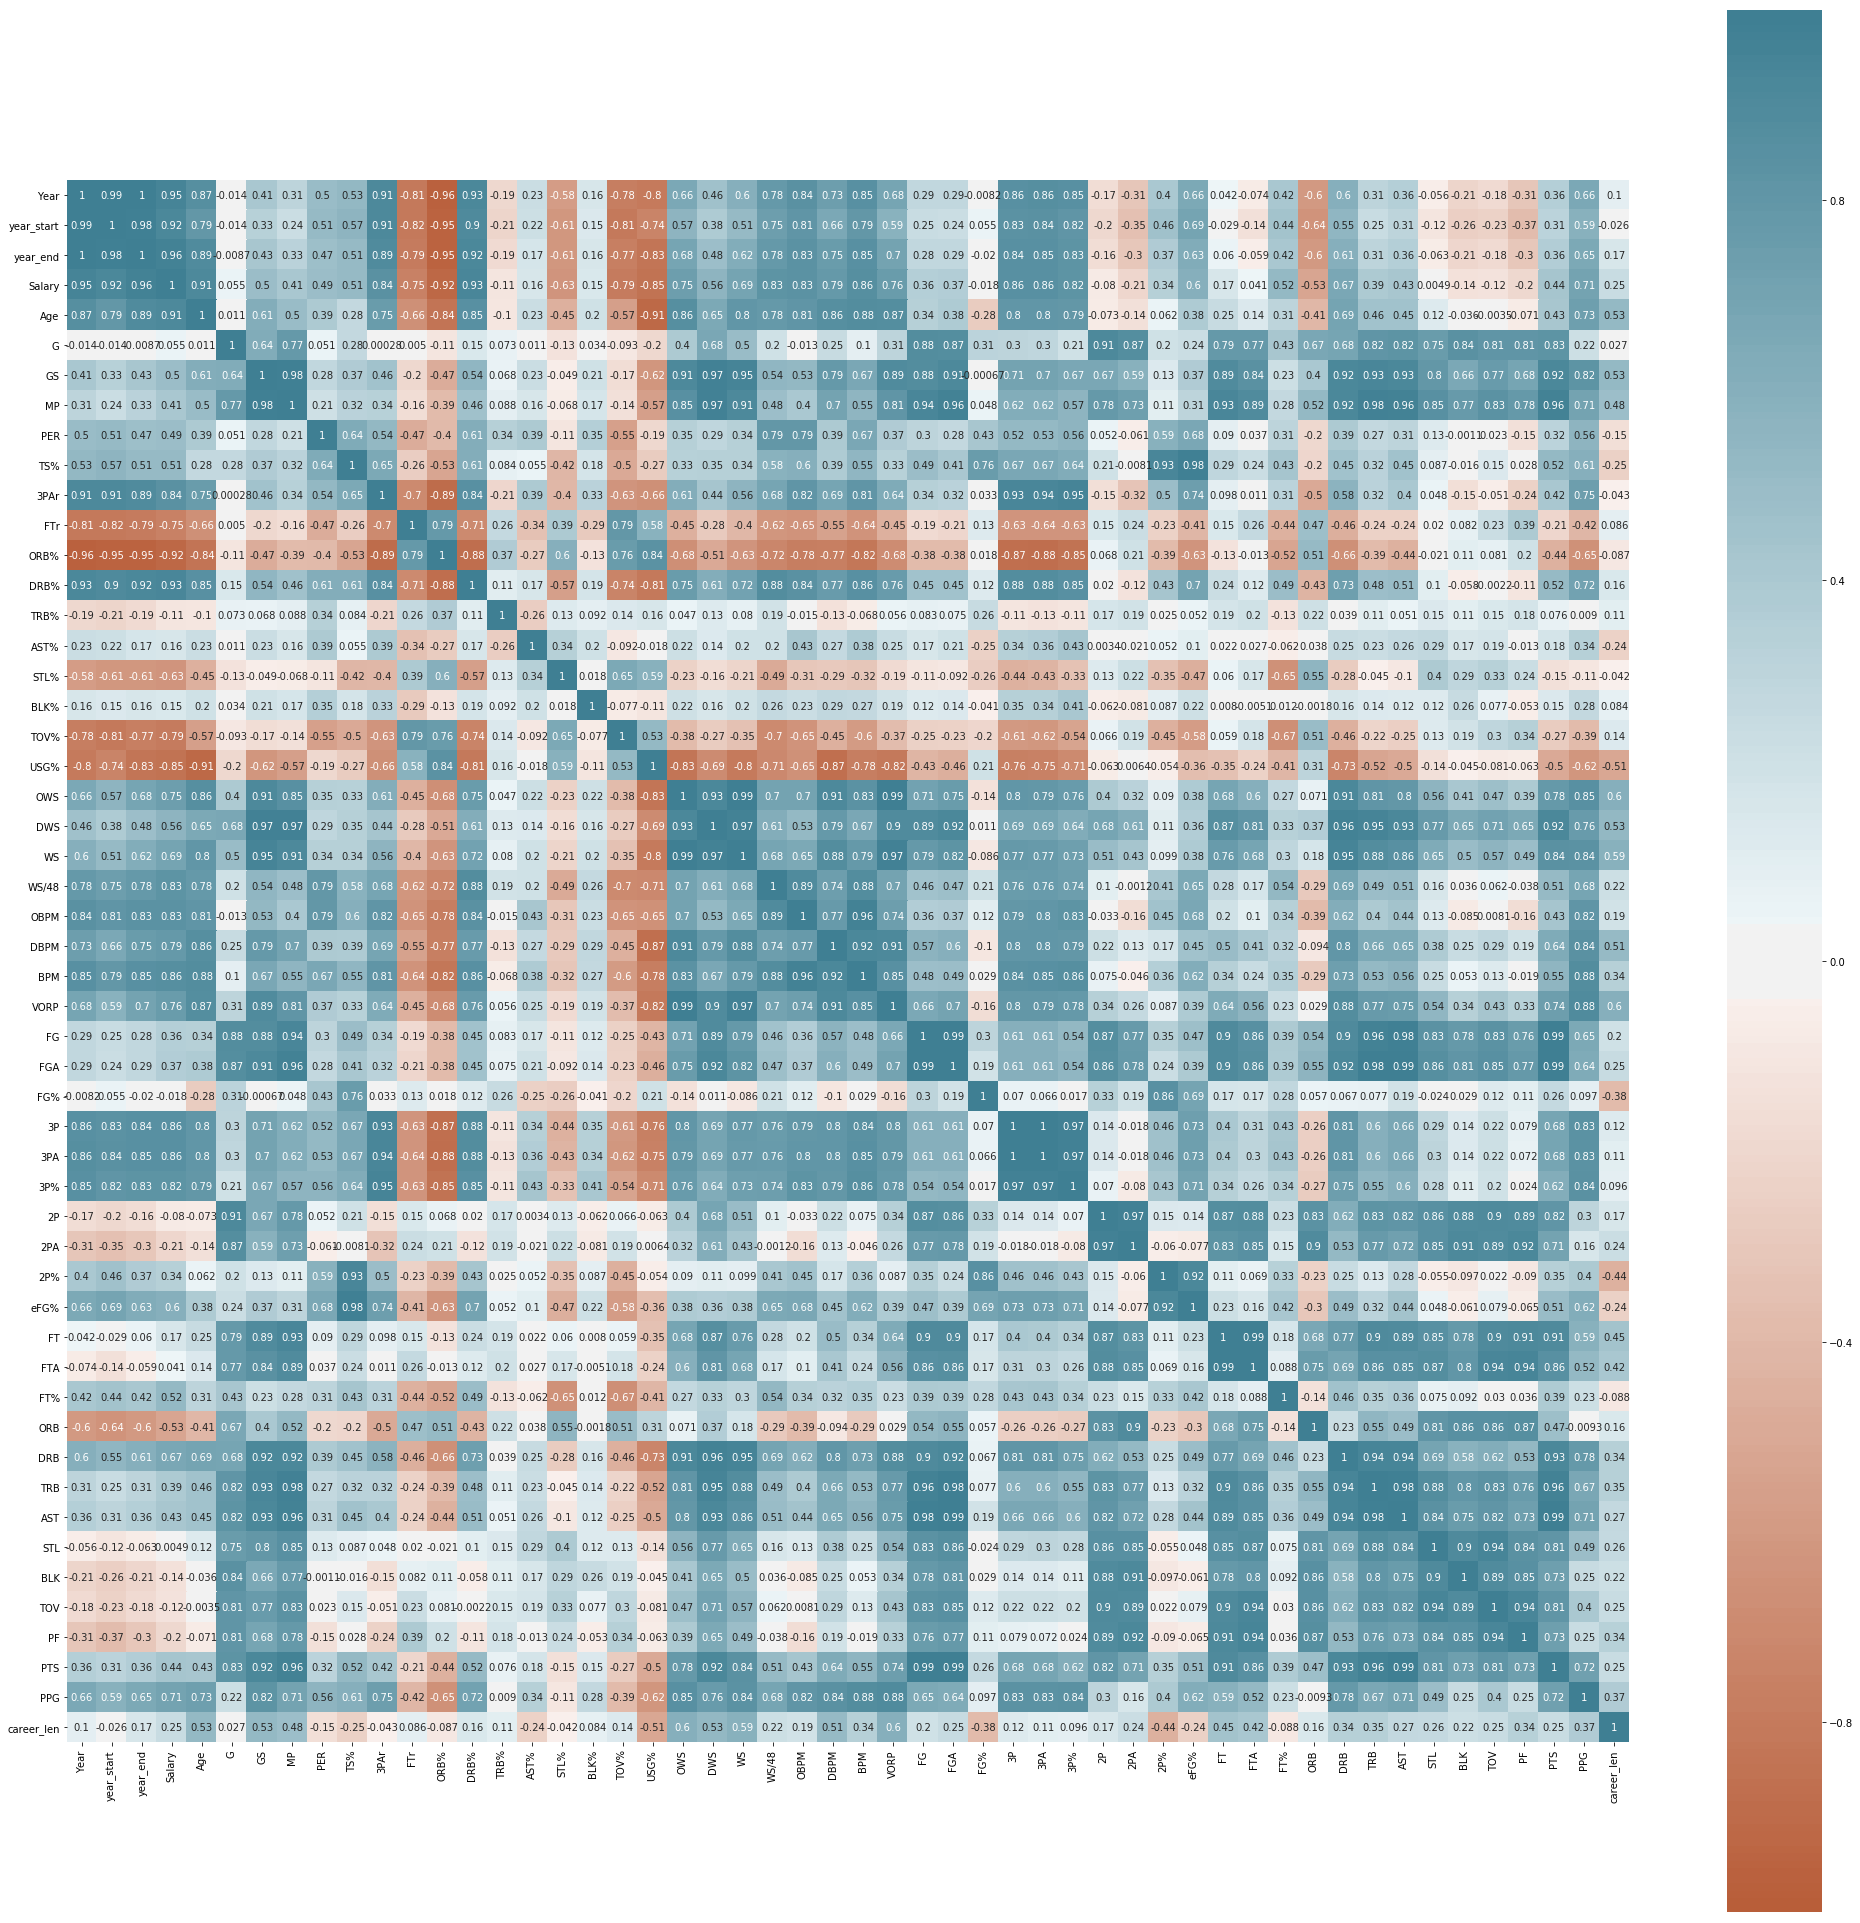

In [104]:
# We create a a heatmap with our correlation between -1 and 1. As with the earlier heatmap, this is also annotated.
plt.figure(figsize=(35, 35))
corravg = nbaavg.corr()
axis = sns.heatmap(corravg, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(25, 220, n=200),
    square=True, annot=True)


 This heat map of the average values of the original stats indicates a high correlation between several categories. We'll 
 use this as a guide as to which relationships to investigate further. For example, salary seems to have a high positive
 correlation with age, 3PAr, BPM, VORP, 3PA, 3PM, 3P%, and PPG. So, those are worth investigating. However, 
 it may also be worth investigating why there's a strong negative correlation with TOV% and USG%. 

C:\Users\K\Anaconda373\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\K\Anaconda373\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


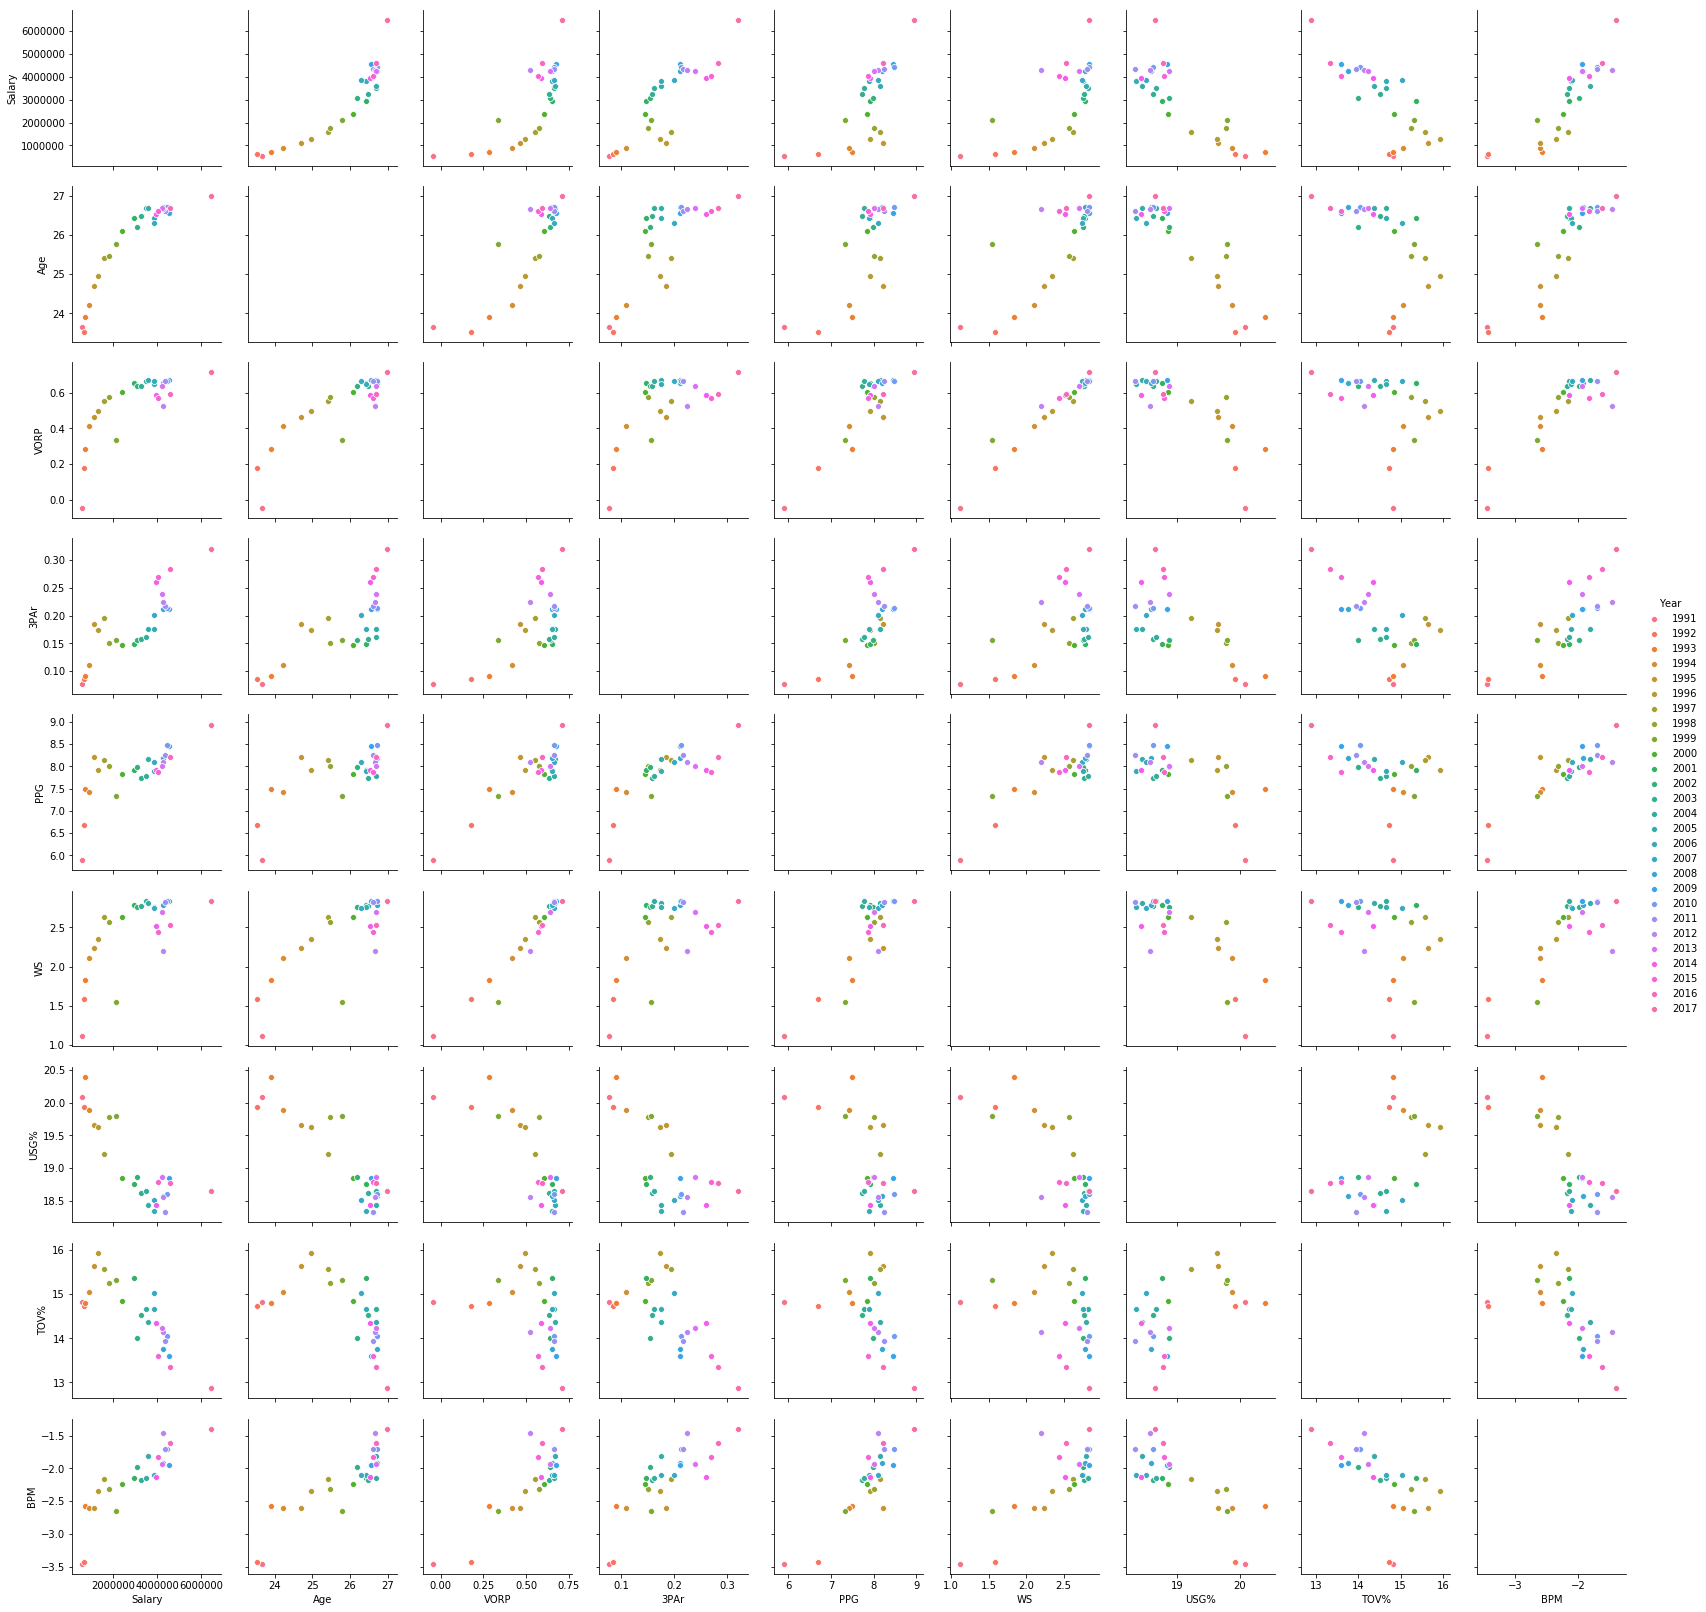

In [105]:
# Pairplot of several stats that is hued by year. 
sns.pairplot(nbaavg, vars=['Salary', 'Age', 'VORP', '3PAr', 'PPG', 'WS', 'USG%', 'TOV%', 'BPM'], hue='Year')

Looking at the above pairplot of various stats that are positively and negatively correlated, there are some obvious trends (such as salary increasing with age, as we've already established, or VORP and WS being highly correlated), but there are some interesting trends as well - Salary and BPM appear to be highly correlated and both seem to be increasing as the data approaches 2017. The same can be said of salary and both VORP and WS. However, salary is fairly negatively correlated with USG% and TOV%. We can look at some of these a bit closer below. 

There are several other interesting correlations that can be explored as well (age and VORP, TOV% and BPM, for example), but since our main concern is statistical relationships with salary, we'll have to leave those unexplored for now.  

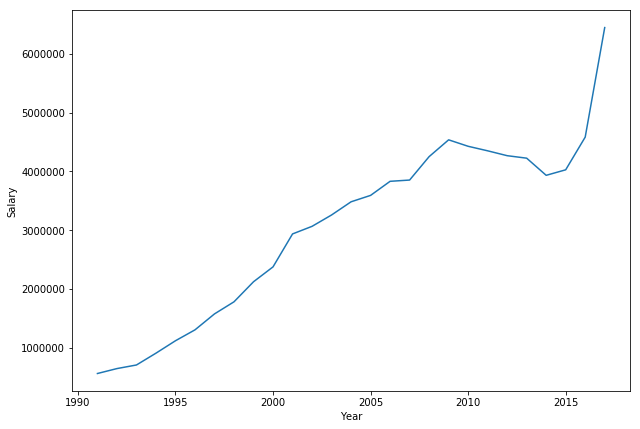

In [87]:
# A line plot of average salary per year.
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='Salary',  data=nbaavg)

It's important to keep in mind, in light of the aforementioned discussion, that salaries are lower in the 1990s than they should be because of the smaller and younger player population. Yet, even as the population stabilizes by 2005, salary is still lower than the last few years.

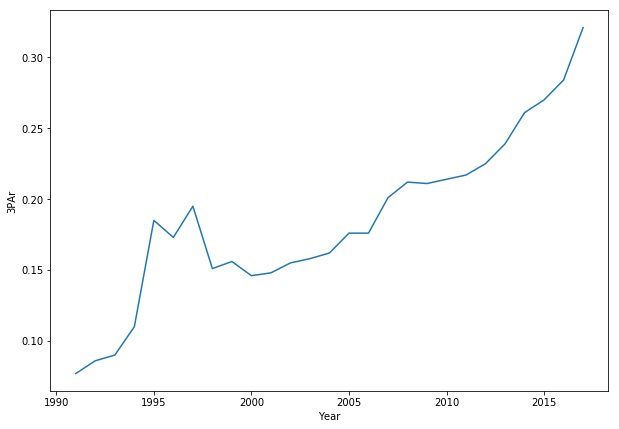

In [89]:
# 3PAr vs. year
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='3PAr',  data=nbaavg)

3PAr, which is calculated by dividing 3 point attempts by field goal attempts have increased quite dramatically since about 2007. It's due in part to a change in strategy in which teams are much more likely to attempt 3 point shots than in any point
in NBA history. As a result, top 3 point shooters, such as Stephen Curry and Klay Thompson have become quite valuable and have
signed lucrative contracts. 

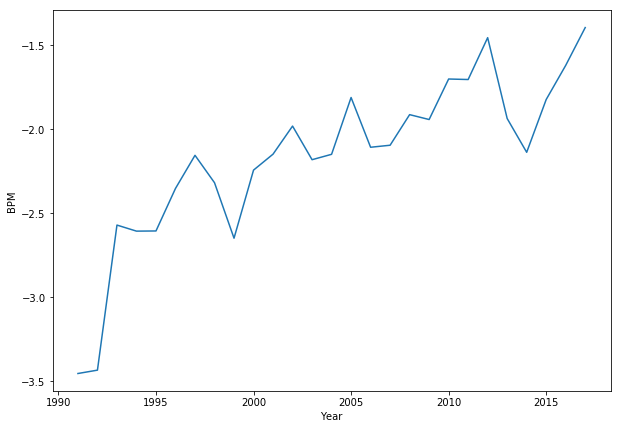

In [100]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='BPM', data=nbaavg)

BPM appears to fluctuate quite a bit, but the overall general trend has been upward. 

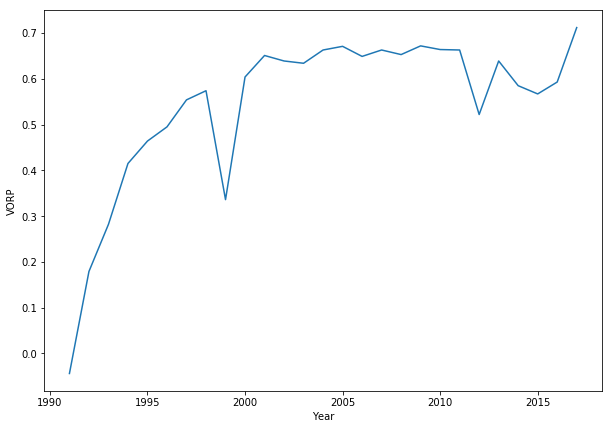

In [92]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='VORP',  data=nbaavg)

VORP is relatively stable since 2005. The pre 2005 values can be explained by higher concentration of young players
in each of those years (again due to the bias in our dataset). So, it appears VORP is generally higher for more experienced players. Yet, it also appears that there have not been any significant increases in VORP over the years. 

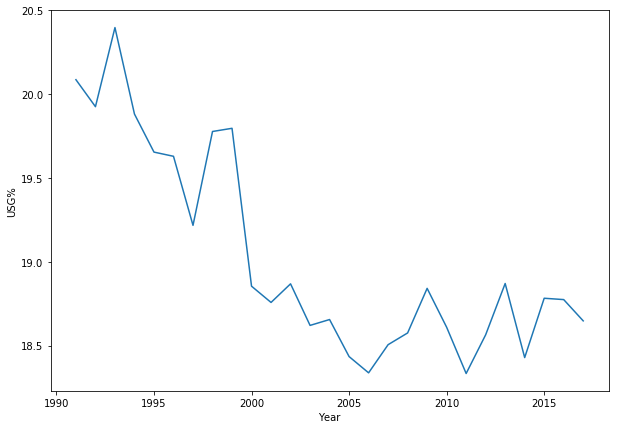

In [109]:
# USG% against years
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='USG%',  data=nbaavg)

Usage percentage, which measures the percentage of the number of offensive plays that a player is involved in, appears to have dropped quite significantly since 1991. But since 2005, it's been relatively stable, which suggests
that USG% is higher among younger players. Thus, if there was less bias in our data, we might see a more stable USG% over our 
entire timeline.

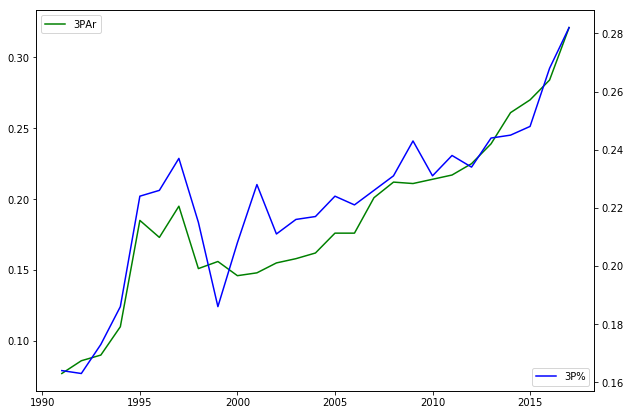

In [122]:
# Graph of both 3PAr and 3P% against year. After defining both stats, they are graphed in subplot with a seperate legend 
# for each. 
g = nbaavg['Year']
h1 = nbaavg['3PAr']
h2 = nbaavg['3P%']

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(g, h1, color='green', label='3PAr')
plt.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(g, h2, color='blue', label="3P%")
plt.legend(loc='lower right')

Of the aforementioned stats, the only one that we can safely say has increased/decreased as significantly as salary would be 3APr. However, there isn't necessarily a causal relationship between the two variables. As we mentioned previously, the NBA's play style has changed in recent years, with more 3-pointers being attempted and the league overall becoming better at making 3-pointers, as the graph immediately above shows. Thus, good 3-point shooters have become more valuable and are being paid better as a whole. However, we can't necessarily say that their increased salaries contribute to an overall increase since most players in the modern NBA seem to be paid better than their past counterparts.

So, to answer our last question, 3-point play making has gotten better over the years, but most stats averages have not changed significantly over the years, at least not in correlation with salary. As a result, players are likely not being paid more because they play "better" than players of the past (despite the fact that they may be more athletic), but it's more likely due to factors outside of this dataset, such as better union-negotiated benefits and the fact that there is just more money in the NBA than ever before.
 
